# Project 1 - Explore Weather Trends

by Arijeet Biswas

## General Guidelines
### Summary
In this project, we are analyzing local and global temperature data and comparing the temperature trends where I am from to overall global temperature trends.

### Work Process
The goal is to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where we live. To do this, we will follow the following steps:

- Extract the data from the database. There is a workspace in the next section that is connected to a database. We will need to export the temperature data for the world as well as for the closest big city to where you live. We can find a list of cities and countries in the city_list table. To interact with the database, we have to write the following SQL query.

    - Write a SQL query to extract the city level data and export to CSV.
    - Write a SQL query to extract the global data and export to CSV.
- Open up the CSV in the tool we are comfortable using. In our case we are using Python.

- Create a line chart that compares our city’s temperatures with the global temperatures. Make sure to plot the moving average rather than the yearly averages in order to smooth out the lines, making trends more observable.

- Make observations about the similarities and differences between the world averages and your city’s averages, as well as overall trends. Here are some questions to get you started.

    - Is the city hotter or cooler on average compared to the global average? Has the difference been consistent over time?
    - “How do the changes in the city’s temperatures over time compare to the changes in the global average?”
    - What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

## Step 1 - Extracting Data


First of all we need to check the number of rows for the "city_data" table (SQL).

**Output:**71311

The full dataset are queried with the * symbol and I save the csv files on to my computer.

**Now we will start exploring data using 'Python'**

In [3]:
# loading libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression#calc the trend-data for later plots

In [17]:
#load the datasets
df_city_data = pd.read_csv("/Users/arijeet/city_data.csv")
df_global_data = pd.read_csv("/Users/arijeet/global_data.csv")
df_city_list = pd.read_csv("/Users/arijeet/city_list.csv")

In [5]:
df_city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


## Step 2 - Exploring Data

In [6]:
#checking info of city_data 
df_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 4 columns):
year        71311 non-null int64
city        71311 non-null object
country     71311 non-null object
avg_temp    68764 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [7]:
#checking the head of city_data
df_city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


The sum of the entries in the loaded dataframe equals the result of the SQL query, what means, that everything worked correctly.

But the "df_city_data" dataframe has some data missing in the "avg_temp" column. The following step will be focused on finding out how much of the data is missing and how many different countries are affected by that.

In [9]:
#calculate missing values in the "avg_temp" column
missing_data=df_city_data['avg_temp'].isna()
sum(missing_data)

2547

In [12]:
#calculate the number of affected unique city names
len(df_city_data[missing_data]['city'].unique())

235

**From all the data there are 2547 datapoints missing and 235 cities have missing data in the time span. Missing data can cause a problem because some methods and functions throw an error while getting "NaN" values. In our specific case we will find where all we are getting missing values and then we will try to figure out how to deal with them.**
    
Now before moving further with our analysis, lets check global_data dataframe.

In [18]:
#checking the info of the global_data dataframe
df_global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [28]:
df_global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


It looks like there is __no data missing in the global_data dataframe.__ 

In order to check whether there are some years in the data missing or not, the maximum and minimum values of the years can be used to find that out.

In [20]:
#calculate the mininmal value of the "year" column in the global_data dataframe
print(df_global_data['year'].min())

1750


In [21]:
#calculate the maximum value of the "year" column in the global_data dataframe
print(df_global_data['year'].max())

2015


The maximum year is 2015, while the minimum year is 1750. This means that **there is data for all of the 265 years and no year is missing in "df_global_data".**

In the following steps we will be choosing the desired city

In [22]:
df_city_list[df_city_list['country']=='India']

,city,country
6,Agra,India
7,Ahmadabad,India
12,Allahabad,India
14,Amritsar,India
30,Bangalore,India
44,Bhopal,India
85,Delhi,India
117,Haora,India
125,Hyderabad,India
129,Indore,India


In [23]:
df_haora=df_city_data[df_city_data['city']=='Haora']

In [29]:
df_haora.head()

,year,city,country,avg_temp
24783,2009,Haora,India,27.15
24784,2010,Haora,India,27.29
24785,2011,Haora,India,26.41
24786,2012,Haora,India,26.94
24787,2013,Haora,India,27.37


In [26]:
#calcuate the sum of the missing value in the Haora dataframe in the column "avg_temp"
sum(df_haora['avg_temp'].isna())

5

In [27]:
#showing the 5 missing values
df_haora[df_haora['avg_temp'].isna()]

,year,city,country,avg_temp
24582,1808,Haora,India,NaN
24583,1809,Haora,India,NaN
24584,1810,Haora,India,NaN
24585,1811,Haora,India,NaN
24586,1812,Haora,India,NaN


In [33]:
#calculate the mininmal value of the "year" column in the Haora dataframe
print(df_haora['year'].min())

1796


In [34]:
#calculate the mininmal value of the "year" column in the Haora dataframe
print(df_haora['year'].max())

2013


In [36]:
len(df_haora['year'].unique())

218

There are five values missing. Imputations are creating false data points/bias and since the missing data in the "Haora" dataframe is for years 1808 to 1812 we can select the analysis time period from 1813 to 2013 for both the "global_data" & "Haora' dataframe, since "Haora" dataframe has 218 unique years, starting from 1796, upto 2013. 

In the next step the global_data dataframe and the "Haora" dataframe will be copied. Also it will be made sure, that both dataframes fit in size (1813 - 2013) in order to compare the data better. In addition the rolling mean will be calculated with a window of 5 years. This should lead to a better readable plot without losing too much information. The last step consists of resetting the index of the "Haora" dataframe, so that the index of both dataframes also fit and the correlation can be calculated later.

In [46]:
#create a copy of the city_data dataframe and the global_data dataframe for our needs
df_haora=df_city_data[(df_city_data['city']=='Haora')&(df_city_data['year']>= 1813)].copy()
df_global_data_copy=df_global_data[(df_global_data['year']>= 1813)&(df_global_data['year']< 2014)].copy()

In [47]:
len(df_haora)==len(df_global_data_copy)

True

In [48]:
print(df_haora['year'].min())
print(df_haora['year'].max())

1813
2013


In [49]:
print(df_global_data_copy['year'].min())
print(df_global_data_copy['year'].max())

1813
2013


Now both Haora and Global Dataframe have the same size (1813-2013)

In [50]:
#setting the window for the rolling mean
avg_num = 5

#calculate the rolling mean of Haora city
df_haora["RollingAverage"]=df_haora['avg_temp'].rolling(window=avg_num).mean()

#reset the index of Haora Dataframe
df_haora.reset_index(inplace=True, drop=True)

#calculate the rolling mean of Global Dataframe
df_global_data_copy["RollingAverage"]=df_global_data_copy["avg_temp"].rolling(window=avg_num).mean()

In [51]:
#random checking of Haora Dataframe
df_haora[30:40]

,year,city,country,avg_temp,RollingAverage
30,1843,Haora,India,25.61,25.676
31,1844,Haora,India,25.21,25.626
32,1845,Haora,India,25.43,25.544
33,1846,Haora,India,25.59,25.484
34,1847,Haora,India,25.26,25.420
35,1848,Haora,India,25.28,25.354
36,1849,Haora,India,25.24,25.360
37,1850,Haora,India,25.79,25.432
38,1851,Haora,India,25.74,25.462
39,1852,Haora,India,25.45,25.500


In [52]:
#random checking of Global Dataframe
df_global_data_copy[30:40]

,year,avg_temp,RollingAverage
93,1843,8.17,7.862
94,1844,7.65,7.866
95,1845,7.85,7.876
96,1846,8.55,8.048
97,1847,8.09,8.062
98,1848,7.98,8.024
99,1849,7.98,8.090
100,1850,7.90,8.100
101,1851,8.18,8.026
102,1852,8.10,8.028


**Next step is plotting the data in a line plot. The rolling average will be plotted in front, so that the "raw data" behind it still visible and one can get a feeling about how the rolling mean builds up.
Because the "preparing and plotting" process will repeat often, it is useful to wrap this process up into some functions.**

**The first functions prepares the dataframes for the chosen city(s) and calculates the rolling mean and the trend data. The second function plots the results from the first function and got several options to make the exploration more easy.**

In [56]:
def prep_df(cities, avg_num = 5):
    """
    INPUT: cities - list of strings, city names
           avg_num - integer, window for the rolling mean

    OUTPUT: dictionary with preprocessed dataframes and citynames as key
    """    
    #create empty dict
    results = {}
    
    #loop for all city names
    for x in cities:
        #selecting the required city and year greater than 1812 and less than 2014
        df_x=df_city_data[(df_city_data['city']== x) & (df_city_data['year']>= 1813) & (df_city_data['year']< 2014)].copy()
        
        #calculate rolling average with window = avg_num
        df_x['RollingAverage']=df_x['avg_temp'].rolling(window=avg_num).mean()
        
        #calculating trend
        try:
            #loading model
            trend_model=LinearRegression()
            
            #defining X and Y values
            X=df_x[['year']]
            Y=df_x[['avg_temp']]
            
            #fitting the values to the model
            trend_model.fit(X,Y)
            
            #predict the values with the X data to get the trend line and add it to the dataframe
            df_x['trend']=trend_model.predict(X)
            print(f"{x} slope: {trend_model.coef_}")
            
        except:
            #for NaN values
            print('Cannot calculate trend')
            
        finally:    
            #reset the index and add the dataframe to the dictionary
            df_x.reset_index(inplace = True, drop = True)
            results[x]=df_x
            
    for x in results:
        #print the average temperature from 1813 to 2013 for the chosen countries
        print(f'The average temperature in {x} (1813 - 2013) is: {results[x]["avg_temp"].mean():.2f} °C')
        print(f'Some more {x} values: Max {results[x]["avg_temp"].max():.2f}°C; Min {results[x]["avg_temp"].min():.2f}°C \n')
    
    #copy the global data for years 1813-2013
    df_global_copy=df_global_data[(df_global_data['year']>=1813)&(df_global_data['year']<2014)].copy()
              
    #calculating the trend line for global Dataframe and saving it to results Dataframe
    try:
        trend_model=LinearRegression()
              
        X=df_global_copy[['year']]
        Y=df_global_copy[['avg_temp']]      
        trend_model.fit(X,Y)      
        
        df_global_copy['trend']=trend_model.predict(X)      
        print(f'Global slope: {trend_model.coef_}')
        
    except:
        print("Error while calculating the global trend.")
        
    finally:
        
        df_global_copy["RollingAverage"] = df_global_copy["avg_temp"].rolling(window = avg_num).mean()    
        results["Global"] = df_global_copy

        print(f'The global average temperature (1813 - 2013) is: {df_global_copy["avg_temp"].mean():.2f} °C')
        print(f'More global values: Max: {df_global_copy["avg_temp"].max():.2f} °C; Min: {df_global_copy["avg_temp"].min():.2f} °C')
        #return the dict
        return results                  

def plot_results(result, fig_size = (10,6), global_plot = True, opac = 0.7, show_normal = False, trend = False):
    """
    INPUT: result - dictionary with dataframes from the function "prepare_df"
           fig_size - tuple to determine the size of the figure (width, height)
           global_plot - boolean, shows the plot of global data if set to true
           opac - float, sets the opacity for the city - data plots
           show_normal - boolean, plots also the avg_temp in addition to the rolling mean if set to true
           trend - boolean, shows the trend if set to true
    OUTPUT: plot
    """
    with sns.plotting_context("notebook"):
        #creating the figure and axes for the plot
        fig, ax = plt.subplots(figsize = fig_size)    

        #if global_plot = True shows the global data
        if global_plot:        
            sns.lineplot(x = "year", y = "RollingAverage", data = result["Global"], label = "Global", lw = 1.7)  
            #if trend = True shows the global trend
            if trend:
                sns.lineplot(x = "year", y = "trend", data = result["Global"], label = "Global trend")
            #shows avg_temp in addition if show_normal = True
            if show_normal:
                sns.lineplot(x = "year", y = "avg_temp", data = result["Global"], label = f"Global avg_temp", alpha = 0.5, 
                             color = "grey", lw = 1.2)

        #deletes the "Global" key-value pair in the dictionary to not double plot it    
        result.pop('Global', None)

        #plots the graph for every city-key in the dictionary
        for x in result:
            sns.lineplot(x = "year", y = "RollingAverage", data = result[x], label = x, alpha = opac)              
              
              
            if show_normal:
                sns.lineplot(x = "year", y = "avg_temp", data = result[x], label = f"{x} avg_temp", alpha = 0.5, 
                             color = "grey", lw = 1.2)
            if trend:
                sns.lineplot(x = "year", y = "trend", data = result[x], label = f"{x} trend")

        #loads the legend
        ax.legend()

        #set x and y labels and the title
        ax.set_ylabel("Rolling average temperature in °C")
        ax.set_xlabel("Year")
        ax.set_title("Temperature time-series")

        #deactivate right and top spine
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tight_layout()

        #shows the plot
        plt.show()              

Now lets plot the Global Temp trend

Global slope: [[0.00773545]]
The global average temperature (1813 - 2013) is: 8.43 °C
More global values: Max: 9.73 °C; Min: 6.94 °C


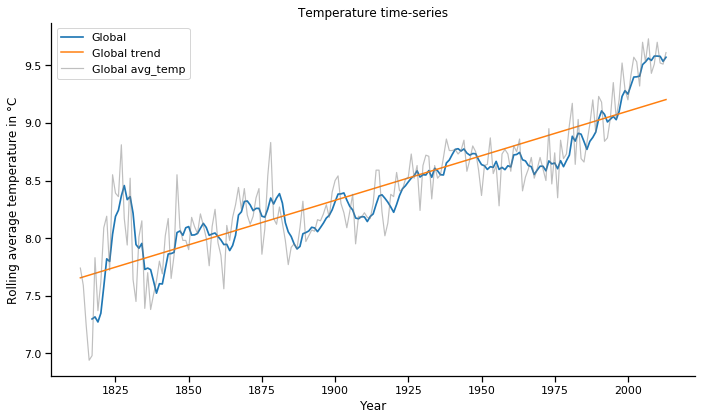

In [61]:
#creating an empty list
cities = []
#calling the newly created functions
plot_results(prep_df(cities), global_plot=True, show_normal=True, opac = 1, trend = True)

**From the graph above the global uptrend of temperature is evident.**

**Also the global temperature seems to increase at a faster rate for the last 50 years.** 

Haora slope: [[0.00725743]]
The average temperature in Haora (1813 - 2013) is: 26.02 °C
Some more Haora values: Max 27.37°C; Min 20.97°C 

Global slope: [[0.00773545]]
The global average temperature (1813 - 2013) is: 8.43 °C
More global values: Max: 9.73 °C; Min: 6.94 °C


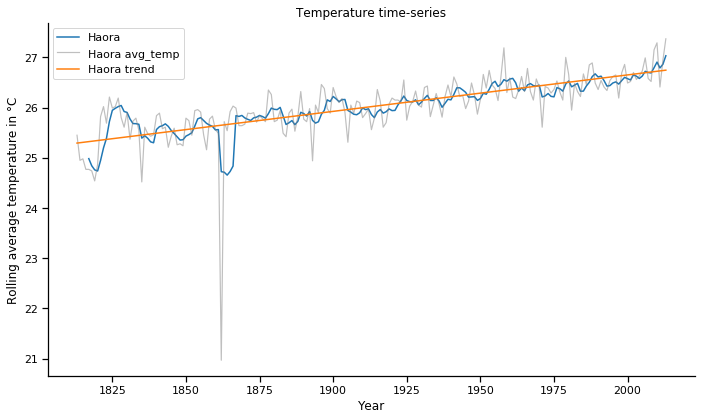

In [63]:
#creating an empty list
cities = ['Haora']
#calling the newly created functions
plot_results(prep_df(cities), global_plot=False, show_normal=True, opac = 1, trend = True)

**The graph shows an overall uptrend in the average temperature for Haora. The calculated numbers tell us, that the slope for the "Haora" data is slightly lower than the global overall slope. The average temperature in Haora is much higher than the global average, since Haora has a tropical climate.**

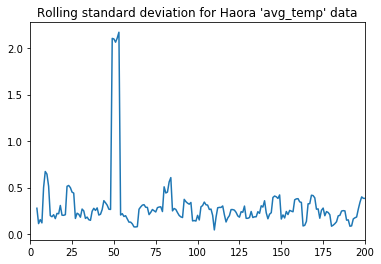

In [69]:
df_haora["avg_temp"].rolling(window = avg_num).std().plot()
plt.title("Rolling standard deviation for Haora 'avg_temp' data");

**The standard deviation is really low for most of the time other than at the 50 year mark. This year is almost equal to year 1863 and at which point we can see a sharp decline in Haora's temperature from the graph as well.**

**In the next step the Global data plot will be plotted in the same figure as the Berlin data plot to compare them.**

Haora slope: [[0.00725743]]
The average temperature in Haora (1813 - 2013) is: 26.02 °C
Some more Haora values: Max 27.37°C; Min 20.97°C 

Global slope: [[0.00773545]]
The global average temperature (1813 - 2013) is: 8.43 °C
More global values: Max: 9.73 °C; Min: 6.94 °C


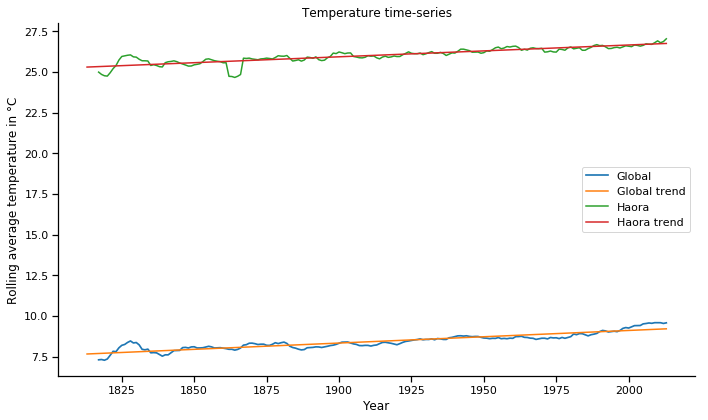

In [70]:
#creating an empty list
cities = ['Haora']
#calling the newly created functions
plot_results(prep_df(cities), global_plot=True, show_normal=False, opac = 1, trend = True)

**At the end of the time series both of the graphs show a rather strong uptrend. Overall both graphs look highly correlated. Also the slope of the Haora Trend is lower than the global slope, which means that the global average temperature is increasing faster.**

**In the next step the correlation of the two graphs will be calculated to see how much they are correlated in truth.**

In [71]:
#calculating the correlation between the Haora avg_temp and the global avg_temp
df_haora[["avg_temp"]].corrwith(df_global_data_copy["avg_temp"])

avg_temp    0.407332
dtype: float64

**With 0.40 correlation the Haora Data and the Global Data are moderately correlated.**

## Step 3 - Conclusion

**So to conclude, there is a clear overall uptrend in the average global temperature. From which we can assume that the temperature will keep increasing in future as well**

The Indian city of Haora got compared to the global data (1813 - 2013):

- The place of my stay Haora has a higher average temperature compared to world’s average temperature, so Haora is hotter than the global average temperature.
- There is a trend of increasing local & global temperature, which is to say that the earth is getting hotter with time. This trend has been consistent through the years, as the chart depicts.
- The moderate correlation shows that temperature difference between Global temperature and Haora temperature is fairly same.
- The slope of the global trend is higher than compared to the german cities, so the global average temperature is increasing faster.